# Part -3 
Performing analysis on Housing price datset(taken from kaggle)

# Housing Price Dataset

The file "data_description.txt" contains a detailed information about all the columns in this particular dataset and what respective values these columns hold.

In [1]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
# color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

%matplotlib inline

In [2]:
# reading the data

data = pd.read_csv("train.csv")

In [3]:
# Baic Information about the data
print(f'Data Shape : {data.shape}')

Data Shape : (1460, 81)


So the dataset has 81 columns and 1460 rows

In [4]:
# Data info
data.info()        # this tells us about the null-count and the datatype of every column in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The Null values in the object type variables are NA (Not Available). 
There are some NaNs present in continuous variable as well.

In [5]:
# Getting the number of continuous and categorical variables
cat_cols = [x for x in data.columns if data[x].dtype == 'object']
cont_cols = [x for x in data.columns if data[x].dtype != 'object']

print(f'Total categorical variables in the dataset: {len(cat_cols)}')
print(f'Total continuous variables in the dataset: {len(cont_cols)}')

Total categorical variables in the dataset: 43
Total continuous variables in the dataset: 38


/home/julian/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


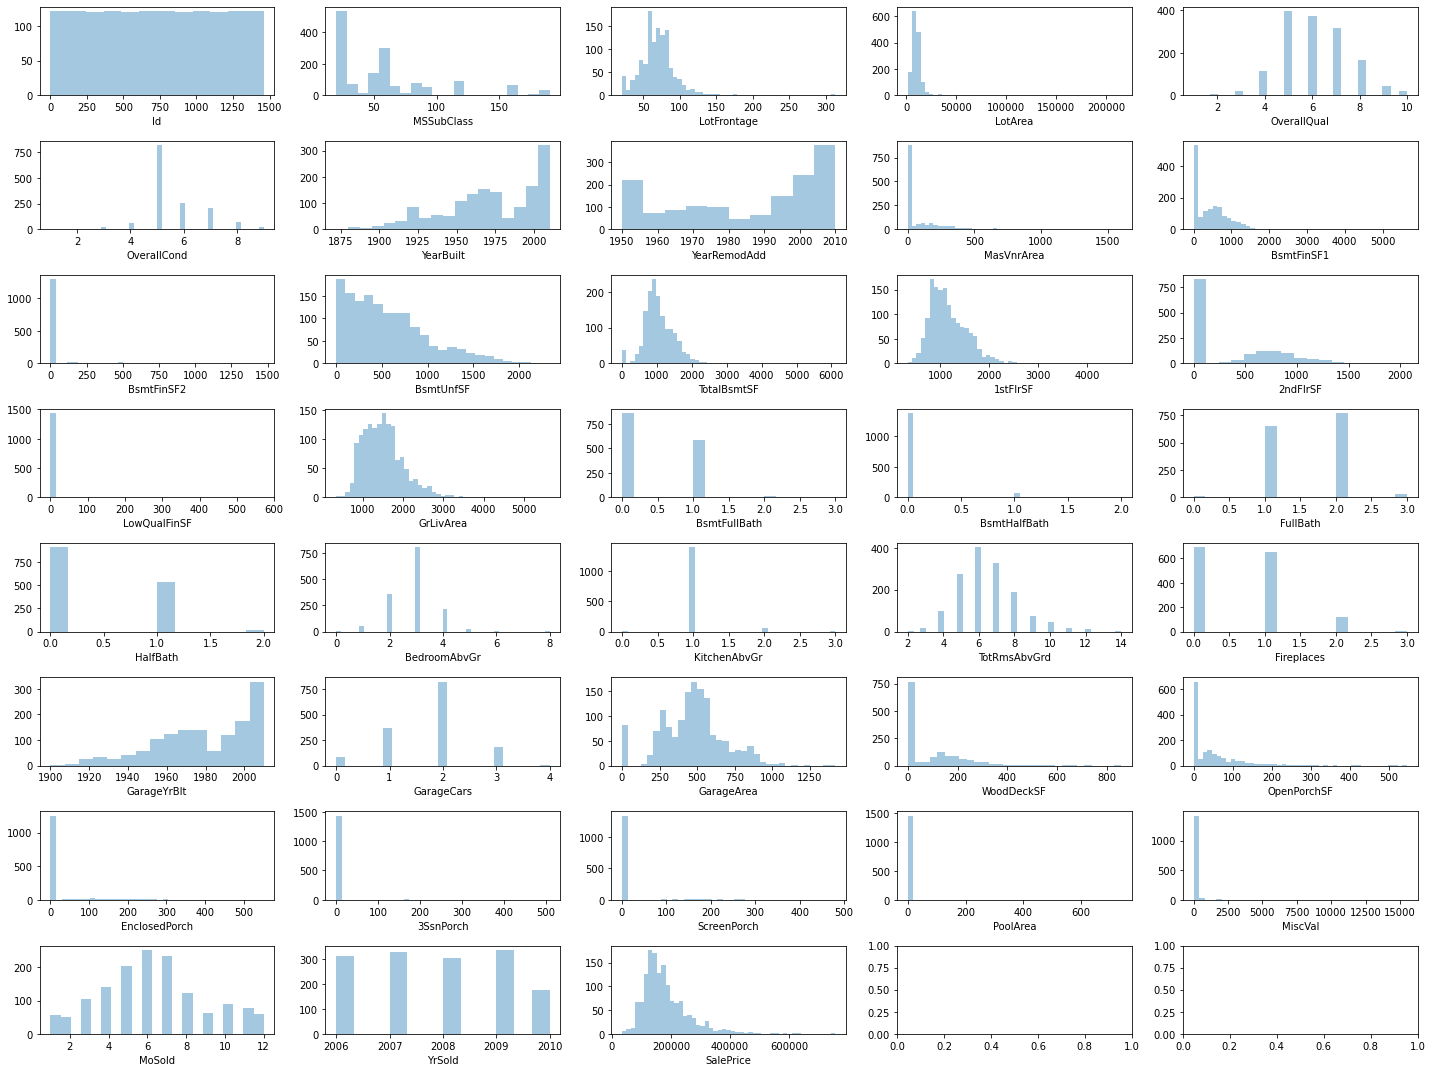

In [6]:
# Plotting the distribution of the continuous variables
fig, axs = plt.subplots(8, 5, figsize=(20, 15))
axs = axs.flatten()

for i, column in zip(range(len(cont_cols)), cont_cols):
    sns.distplot(data[column], ax=axs[i], kde=False)
    plt.tight_layout()

Not all the numerical columns are continous, there are discrete columns which show some order of category in many variables in the data set.

Ordinal Categories:

1. MSSubClass
2. OverallQual
3. OverallCond

There are other variables which have order but cannot be treated as ordinal eg. Baths, Fireplaces, Garages...These are continuous variables only.

## Analysing "Sale Price" column

In [7]:
#descriptive statistics summary
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

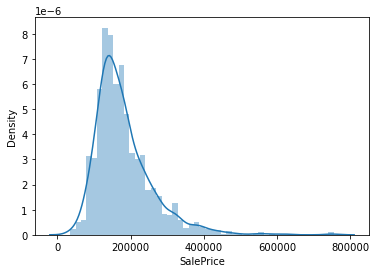

In [8]:
#histogram
sns.distplot(data['SalePrice']);

Relationship with numerical variables

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

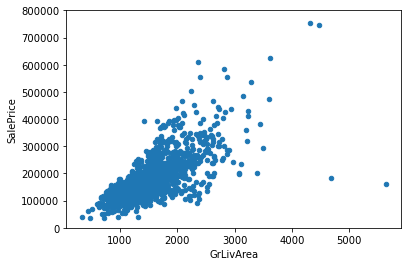

In [9]:
#scatter plot grlivarea/saleprice

var = 'GrLivArea'
d1 = pd.concat([data['SalePrice'], data[var]], axis=1)
d1.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

'SalePrice' and 'GrLivArea', with a linear relationship.

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

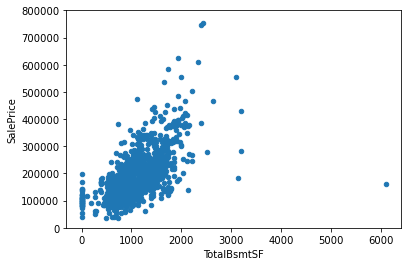

In [10]:
var = 'TotalBsmtSF'
d2 = pd.concat([data['SalePrice'], data[var]], axis=1)
d2.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

## Correlation matrix (heatmap style)

<AxesSubplot:>

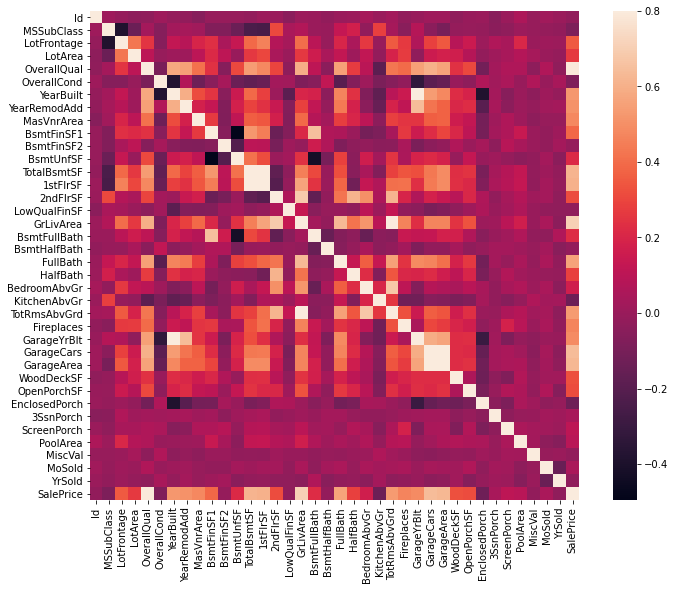

In [11]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In my opinion, this heatmap is the best way to get a quick overview of relationships.

## Misc values

Max Train distibution of MiscVal at: 0


/home/julian/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


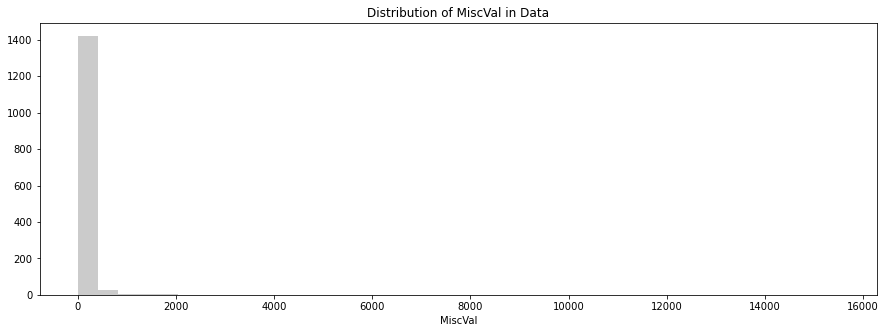

In [12]:
# Figure
fig, axs = plt.subplots(1, figsize=(15,5))
# axs = axs.flatten()

axs.set_title('Distribution of MiscVal in Data')
sns.distplot(data.MiscVal, ax=axs, color=color_pal[7], kde=False)

print(f"Max Train distibution of MiscVal at: {data.MiscVal.value_counts(sort='DESC').index[0]}")

MiscVal is the amount in dollars of the miscellaneous features provided with the property. The selling price includes this value, so it will be directly related to the selling price of the propety. However the maxima is observed at 0, i.e no extra price is added to the final selling price.

# Missing values

In [13]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Missing data can be handled in number of ways according to the particular dataset.

## Outliers

An outlier is an observation that appears to deviate markedly from other observations in the sample. Identification of potential outliers is important for the following reasons. An outlier may indicate bad data. 

####  Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [14]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(data['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


/home/julian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


1. Low range values are similar and not too far from 0.
2. High range values are far from 0 and the 7.something values are really out of range.

#### Bivariate analysis

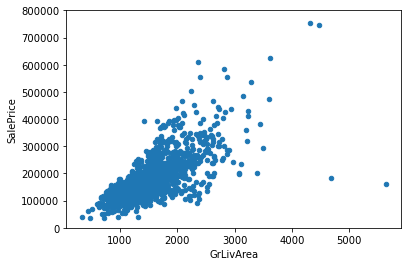

In [15]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
d3 = pd.concat([data['SalePrice'], data[var]], axis=1)
d3.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening.
 Therefore, we'll define them as outliers

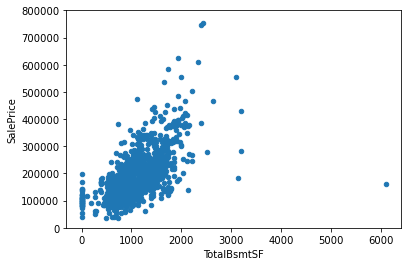

In [16]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
d4 = pd.concat([data['SalePrice'], data[var]], axis=1)
d4.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));